In [ ]:
# === 1. Import Library ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# === 2. Membaca Dataset ===
df = pd.read_csv("/content/sample_data/dataset_cabai_baru.csv")
print("=== Data Harga Cabai Madiun ===")
print(df)

=== Data Harga Cabai Madiun ===
    Minggu  Harga_Cabai
0        1        27000
1        2        32000
2        3        25000
3        4        38000
4        5        30000
5        6        42000
6        7        31000
7        8        45000
8        9        36000
9       10        48000
10      11        34000
11      12        50000
12      13        37000
13      14        46000
14      15        33000
15      16        49000
16      17        36000
17      18        52000
18      19        38000
19      20        54000


In [ ]:
# === 3. Pisahkan Fitur dan Target ===
X = df['Minggu'].values.reshape(-1, 1)
y = df['Harga_Cabai'].values

In [ ]:
# === 4. Polynomial Regression (Degree 4 untuk naik-turun jelas) ===
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [ ]:
# === 5. Tampilkan Koefisien ===
print("\n=== Koefisien Model Polynomial Regression (Degree 4) ===")
for i, coef in enumerate(model.coef_):
    print(f"θ{i} : {coef}")
print("Intercept (θ0) =", model.intercept_)


=== Koefisien Model Polynomial Regression (Degree 4) ===
θ0 : 0.0
θ1 : -869.6157134482663
θ2 : 707.4880204300457
θ3 : -66.87538495727563
θ4 : 1.8265718498729484
Intercept (θ0) = 28216.589267273783


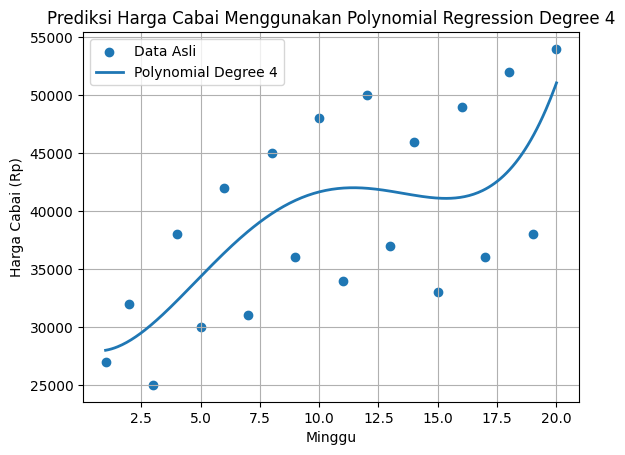

In [ ]:
# === 6. Grafik Prediksi ===
X_range = np.linspace(1, df['Minggu'].max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

plt.scatter(X, y, label="Data Asli")
plt.plot(X_range, y_pred, label="Polynomial Degree 4", linewidth=2)
plt.xlabel("Minggu")
plt.ylabel("Harga Cabai (Rp)")
plt.title("Prediksi Harga Cabai Menggunakan Polynomial Regression Degree 4")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# === 7. Prediksi Minggu ke-21 ===
pred = model.predict(poly.transform([[21]]))
print("\nPrediksi harga cabai minggu ke-21:", pred[0])


Prediksi harga cabai minggu ke-21: 57857.45614032156
